# Import the libraries

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Load the BHP dataset 

In [3]:
df = pd.read_csv('BHP.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# understand each column

In [4]:
print(len(df))
df.info()


13320
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# get the information of columns and note the observation

# Observation
1. area_type - it describes the area development and resources - no need to do and data preperation
2. availability - it describes the vecancy wheather read to shift right now or not -  no need to do and data preperation
3. Location - it describes the location of the house - very mynior cleaning need
4. size - it describes the size of the house - very mynior cleaning need
5. total_sqft - it describes the size of the house - no need to do and data preperation
6. bath - it describes the no of bathrooms in a house - slight cleaning need
7. balcony - it describes the no of balcony in a house - slight cleaning
8. price - it describes the rent of the house - no need to do and data preperation

# understand the data inside the dataframe using head()

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data cleaning
1. check and remove duplicates
2. handle the missing values
3. check and correct the invalid dtype
4. remove the columns which are not important for  analysis



In [6]:
df = df.drop_duplicates()
df = df.drop(labels='society',axis=1)
df['location']=df['location'].fillna(df['location'].mode()[0])
df['size']=df['size'].fillna(df['size'].mode()[0])
df['bath']=df['bath'].fillna(df['bath'].mode()[0])
df['balcony']=df['balcony'].fillna(df['balcony'].mode()[0])






In [7]:
# df['size']=df['size'].str.split(' ').str[0]
# df=df.astype({'size':int})
# df['sqft']=df['total_sqft'].str.split(' ').str[0]
# df['sqft']=df['sqft'].str.split('Sq').str[0]
# df['sqft']=df['sqft'].str.split('Perch').str[0]
# df['sqft']=df['sqft'].str.split('Acres').str[0]
# df['sqft']=df['sqft'].str.split('Cents').str[0]
# df['sqft']=df['sqft'].str.split('Guntha').str[0]
# df['sqft']=df['sqft'].str.split('Grounds').str[0]
# df=df.astype({'sqft':float})
# df.info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  object 
 4   total_sqft    12791 non-null  object 
 5   bath          12791 non-null  float64
 6   balcony       12791 non-null  float64
 7   price         12791 non-null  float64
dtypes: float64(3), object(5)
memory usage: 899.4+ KB


# Data Transformation

1. replace the 'Ready To Move' by 1 in availability column 


2. keep only the numbers without name_of_units in total_sqft column

    (to convert all units to the smallest unit(sqft) use the below values)

    note: (if keys are found in the data then remove the word and multiply the number with given dict value)
             and At last reinitialize the column by coverting it to int


In [9]:
def f1(df):
    if df['availability']=='Ready To Move':
        return 1
    else:
        return 0

df['availability_type']=df.apply(f1,axis=1)
df['availability']=df.apply(f1,axis=1)
# df=df.astype({'sqft':float})

# Pseudocode


    FUNCTION f1(d):
        val = d['total_sqft']
        res = val
    
        CHECK FOR '-' in val:
            Split by '-'
            Take average of two numbers
            res = average
    
        ELSE:
            ITERATE through each unit in conv_sqft:
                CHECK FOR unit in val:
                    Remove unit from val
                    Convert to float and multiply by conversion factor
                    res = result
    
        RETURN res as float
    

In [10]:
conv_sqft = {
                'Sq. Meter': 10.7639,
                'Sq. Yards': 9,
                'Acres': 43560,
                'Cents': 435.6,
                'Guntha': 1089,
                'Grounds': 2400,
                'Perch':272.25,
                'Sq. Feet': 1  # already in desired unit
                
             }

In [11]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_type
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,1
2,Built-up Area,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1
4,Super built-up Area,1,Kothanur,2 BHK,1200,2.0,1.0,51.00,1
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,1,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,1
13315,Built-up Area,1,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,1
13316,Super built-up Area,1,Richards Town,4 BHK,3600,5.0,2.0,400.00,1
13317,Built-up Area,1,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,1


In [12]:
def f2(df):
    val = df['total_sqft']
    try:
        float(val)
        return val
    except:
        pass
    if '-' in val:
        v = max(val.split('-'))
        return v
    else:
        for key,value in conv_sqft.items():
            if key in val:
                val=val.split(key)[0]
                try:
                    val = int(float(val)*value)
                except:
                    pass
                return val
    return val
    
df['total_sqft']=df.apply(f2,axis=1)
df=df.astype({'total_sqft':float})


3. change the order of the columns (optional)

In [13]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'availability_type'],
      dtype='object')

4. get the top 5 rows

In [14]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_type
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,1
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1
4,Super built-up Area,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          12791 non-null  object 
 1   availability       12791 non-null  int64  
 2   location           12791 non-null  object 
 3   size               12791 non-null  object 
 4   total_sqft         12791 non-null  float64
 5   bath               12791 non-null  float64
 6   balcony            12791 non-null  float64
 7   price              12791 non-null  float64
 8   availability_type  12791 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 999.3+ KB


In [16]:
def f3(df):
    val=df['size'].split(' ')
    return val[0]
df['size']=df.apply(f3,axis=1)
df=df.astype({'size':int})

#  BHP Dataset - Questions

1. Number of houses in the dataset
2. Number of houses that are currently unavailable
3. Number of houses that are currently available with 2BHK
4. Number of houses and highest price in Electronic City
5. Number of 2BHK houses with at least 2 bathrooms and a balcony
6. Top five locations with the most houses for sale
7. Top five locations with the most houses currently available
8. Unique values in the area type column
9. no_of locations in the dataset
10. get the Average price , Highest price and lowest price in each location
11. Details of the top 2 houses with the highest price
12. Highest and Average sqft among all houses
13. Location with the most houses for sale
14. Location with the most houses currently available for sale

In [17]:
print(len(df)) #1

12791


In [18]:
print(len(df[df['availability']==1])) #2

10172


In [19]:
temp=df[df['availability']==1]
print(len(df[df['size']==2])) #3

5261


In [45]:
def f4(df):
    val = df['location']
    if 'Electronic' in val:
        return df[['location','price']]
    else:
        return False
temp=df.apply(f4,axis=1) #4
temp = temp[temp['location'] != False ]
lst=['Electronic City']*len(temp)
temp['location']=lst
temp.groupby('location').agg({'price':['count','max']})

price       
                count    max
location                    
Electronic City   513  700.0

In [21]:
def f4(df):
    bhk = df['size']
    bal = df['balcony']
    bat = df['bath']
    if bhk==2 and bal>=2 and bat>=bat:
        return True
    else:
        return False
df.apply(f4,axis=1).sum() #5

np.int64(2324)

In [22]:
temp = df[df['availability']==1]
temp.groupby(by='location').agg({'availability':'sum'}).sort_values(by='availability',ascending=False)[:5] #6

,availability
location,
Whitefield,325
Sarjapur Road,287
Electronic City,177
Yelahanka,160
Thanisandra,159


In [23]:
temp = df[df['availability']==1]
temp.groupby(by='location').agg({'availability':'sum'}).sort_values(by='availability',ascending=False)[:5] #7

,availability
location,
Whitefield,325
Sarjapur Road,287
Electronic City,177
Yelahanka,160
Thanisandra,159


In [24]:
df['area_type'].unique() #8

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [25]:
df['location'].nunique() #9

1305

In [26]:
df.groupby(by='location').agg({'price':['mean','max','min']}) #10

price                
                            mean     max     min
location                                        
 Anekal                16.000000   16.00   16.00
 Banaswadi             35.000000   35.00   35.00
 Basavangudi           50.000000   50.00   50.00
 Bhoganhalli           22.890000   22.89   22.89
 Devarabeesana Halli  124.833333  160.00   70.00
...                          ...     ...     ...
t.c palya             160.000000  160.00  160.00
tc.palya               60.750000   78.00   48.00
vinayakanagar         200.000000  200.00  200.00
white field,kadugodi  275.000000  275.00  275.00
whitefiled             32.730000   32.73   32.73

[1305 rows x 3 columns]

In [27]:
df.sort_values(by='price',ascending=False)[:2] #11

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_type
13067,Plot Area,1,Defence Colony,10,7150.0,13.0,2.0,3600.0,1
11080,Super built-up Area,0,Ashok Nagar,4,8321.0,5.0,2.0,2912.0,0


In [28]:
print(df['total_sqft'].max())
print(df['total_sqft'].mean()) #12

1306800.0
1932.9497396606994


In [47]:
temp = df[df['availability']==1]
temp.groupby(by='location').agg({'availability':'sum'}).sort_values(by='availability',ascending=False)[:1] #13

,availability
location,
Whitefield,325


In [30]:
df[df['availability']!=1] #14

,area_type,availability,location,size,total_sqft,bath,balcony,price,availability_type
0,Super built-up Area,0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,0
6,Super built-up Area,0,Old Airport Road,4,2732.0,4.0,2.0,204.00,0
10,Super built-up Area,0,Whitefield,3,1800.0,2.0,2.0,70.00,0
21,Super built-up Area,0,Binny Pete,3,1755.0,3.0,1.0,122.00,0
24,Super built-up Area,0,Thanisandra,1,510.0,1.0,0.0,25.25,0
...,...,...,...,...,...,...,...,...,...
13288,Super built-up Area,0,Mahadevpura,2,1050.0,2.0,1.0,42.00,0
13291,Plot Area,0,Weavers Colony,1,812.0,1.0,0.0,26.00,0
13292,Super built-up Area,0,Udayapur Village,3,1440.0,2.0,2.0,63.93,0
13295,Super built-up Area,0,Haralur Road,3,1810.0,3.0,2.0,112.00,0


1. Average price for each area type
2. get the available and not available houses count in each area type
3. proprtion of each area type
4. distribution of prices
5. detect the outliers in prices
6. get the relation b/w sq.feet and prices
7. get the corr of columns using heatmap
8. get the trend of sq.feet and prices

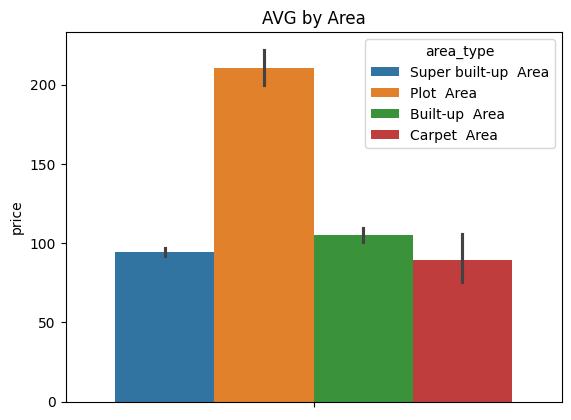

In [50]:
sns.barplot(data=df,y='price',hue='area_type',estimator='mean')
plt.title('AVG by Area')
plt.show()

Observation: the plot area has highest mean price

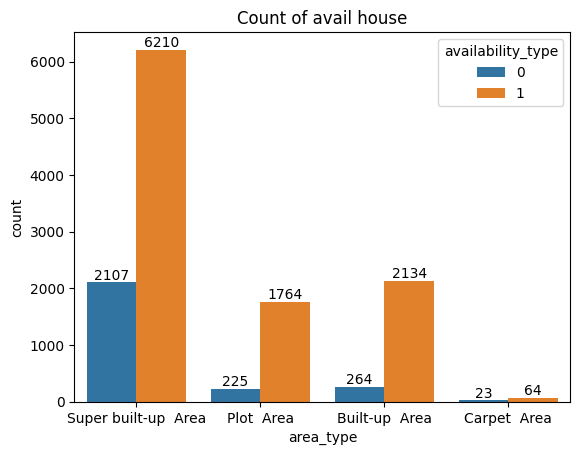

In [32]:
ax=sns.countplot(data=df,x='area_type',hue='availability_type')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of avail house')
plt.show()
# ax=sns.countplot(data=df,x='gender')
# ax.bar_label(ax.containers[0])
# plt.show()


observation: super build-up area has highest availability house

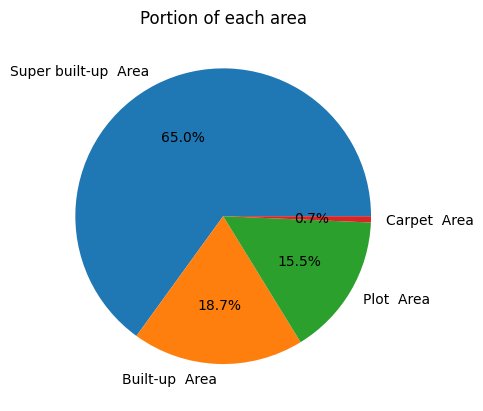

In [33]:
idx=df['area_type'].value_counts().index
val=df['area_type'].value_counts().values
plt.pie(x=val,labels=idx,autopct='%.1f%%')
plt.title('Portion of each area')
plt.show()

observation: the super built-up area has highest prortion among the area type

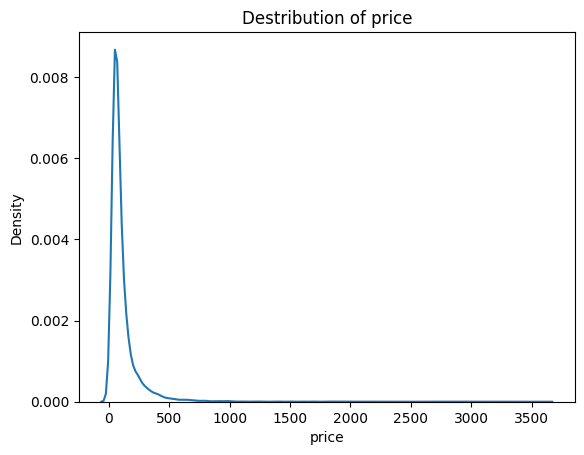

In [34]:
sns.kdeplot(data=df,x='price')
plt.title('Destribution of price')
plt.show()

Observation: most of the price are clustered in between 0 - 400 range

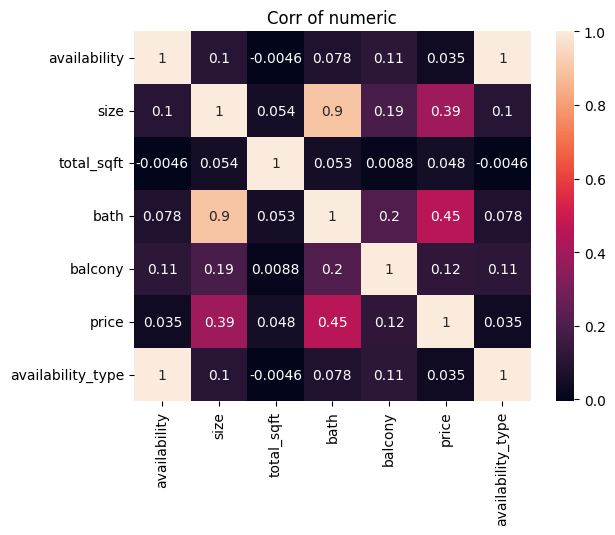

In [35]:
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True)
plt.title('Corr of numeric')
plt.show()

Observation: ther is no strong correlation between price and house square feet. though, it has slight positive corr as 0.048

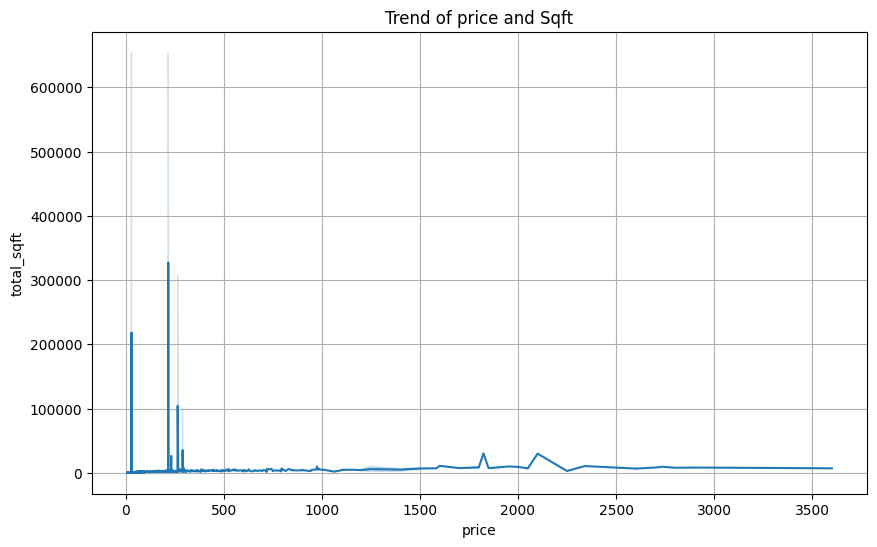

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='price', y='total_sqft', estimator='mean')
plt.title('Trend of price and Sqft')
plt.grid(True)
plt.show()

Observation: there is no significant trend between price and square feet.